# LSTM on Time Series energy consumption data
Dataset: http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

Notebook followed: https://github.com/amirrezaeian/Individual-household-electric-power-consumption-Data-Set-/blob/master/data_e_power.ipynb

In [1]:
import sys
import numpy as np
import pandas as pd

df = pd.read_csv("household_power_consumption.txt", sep=';', parse_dates={'dt': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan', '?'], index_col='dt')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [3]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [4]:
df.shape

(2075259, 7)

In [5]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [6]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## Dealing with missing values

In [7]:
# Finding columns with nan values
dropingListAll = []
for j in range(7):
    if not df.iloc[:, j].notnull().all():
        dropingListAll.append(j)
dropingListAll

[0, 1, 2, 3, 4, 5, 6]

In [8]:
# Fill nan with mean
for i in range(7):
    df.iloc[:, j] = df.iloc[:, j].fillna(df.iloc[:, j].mean())
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64

In [9]:
df['Global_active_power'].resample('M').sum()

dt
2006-12-31    41813.282
2007-01-31    69011.862
2007-02-28    56488.886
2007-03-31    58862.192
2007-04-30    35181.466
2007-05-31    44008.872
2007-06-30    35682.828
2007-07-31    29703.830
2007-08-31    34096.460
2007-09-30    41872.606
2007-10-31    49276.370
2007-11-30    55918.644
2007-12-31    72604.170
2008-01-31    65169.382
2008-02-29    49331.072
2008-03-31    55590.594
2008-04-30    48209.992
2008-05-31    45721.860
2008-06-30    42943.972
2008-07-31    35477.418
2008-08-31    12341.880
2008-09-30    42667.792
2008-10-31    50696.460
2008-11-30    59908.760
2008-12-31    56833.912
2009-01-31    62950.008
2009-02-28    50222.090
2009-03-31    54758.986
2009-04-30    49275.524
2009-05-31    45209.830
2009-06-30    33541.980
2009-07-31    27590.444
2009-08-31    29076.404
2009-09-30    42628.564
2009-10-31    51088.720
2009-11-30    55067.642
2009-12-31    60905.006
2010-01-31    59379.658
2010-02-28    55471.706
2010-03-31    48155.898
2010-04-30    44378.124
2010-05-31   

## Vizualization

### Sum and mean for each day

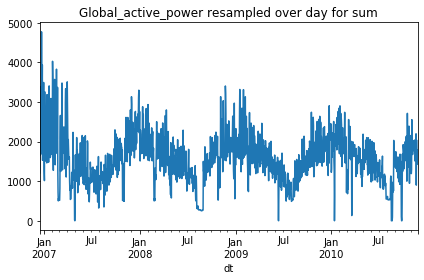

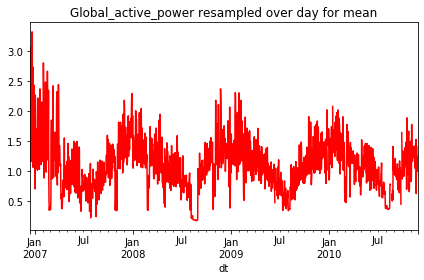

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()


### Mean and std for each day

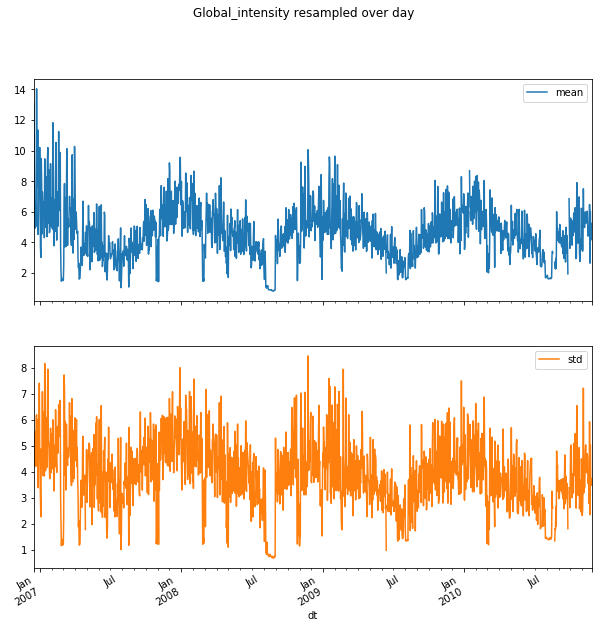

In [19]:
matplotlib.rcParams['figure.figsize']=(10, 10)
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

### Sum per month

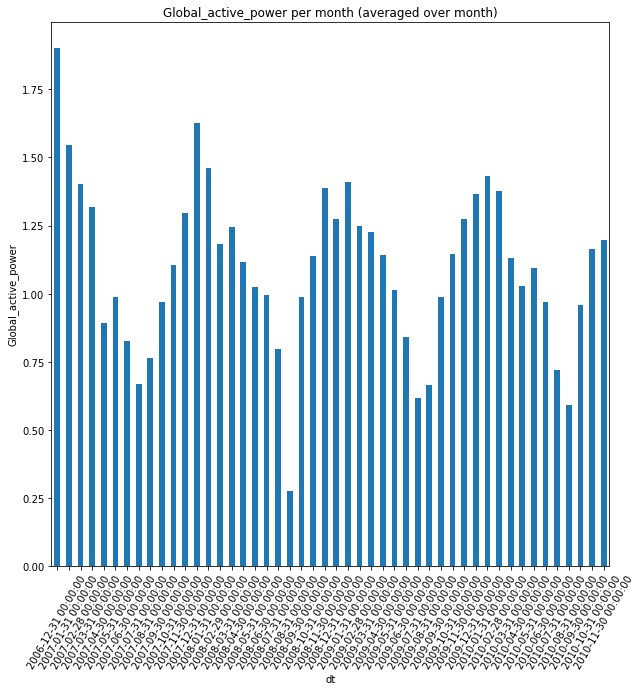

In [20]:
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

### Mean over quarter

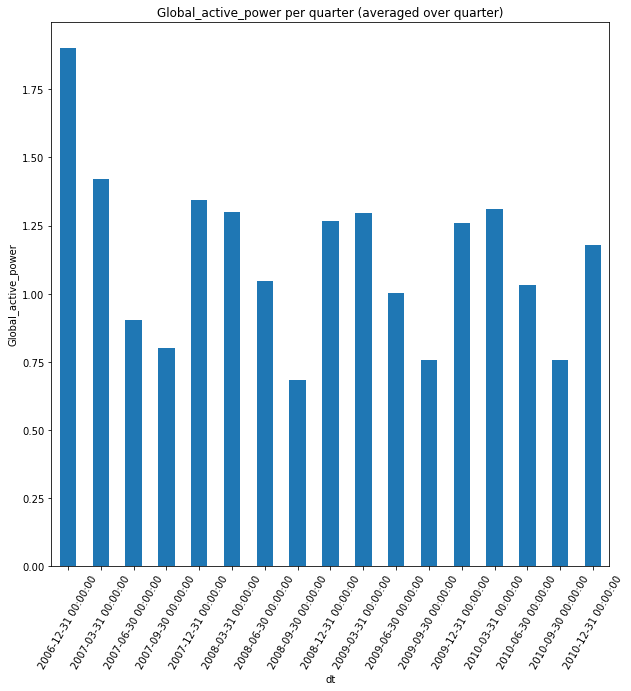

In [22]:
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

### Mean voltage over month

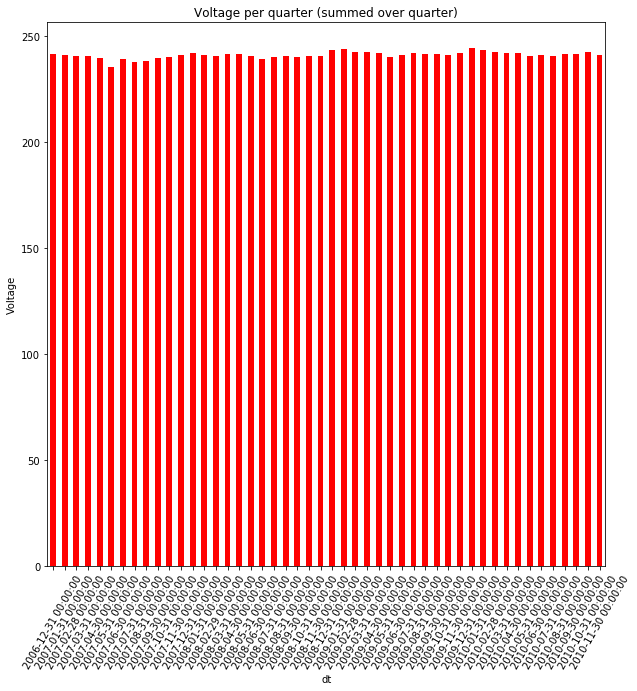

In [24]:
df['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

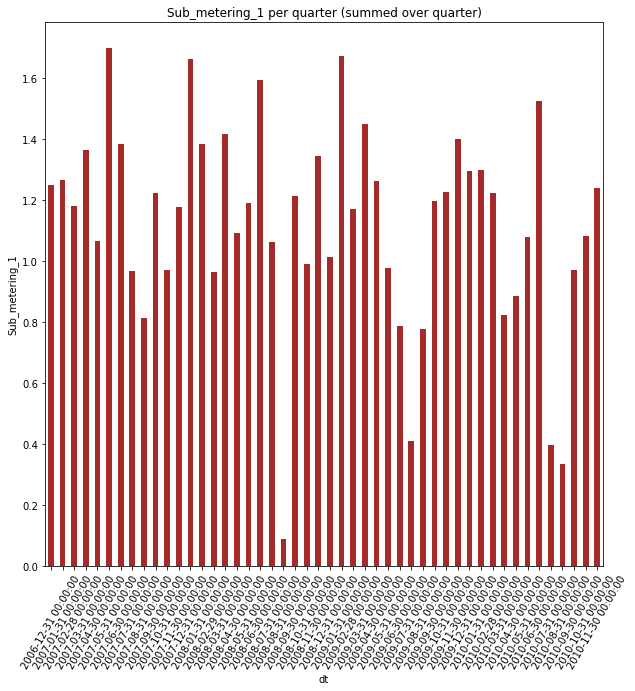

In [25]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

### Mean of different features sampled over each day

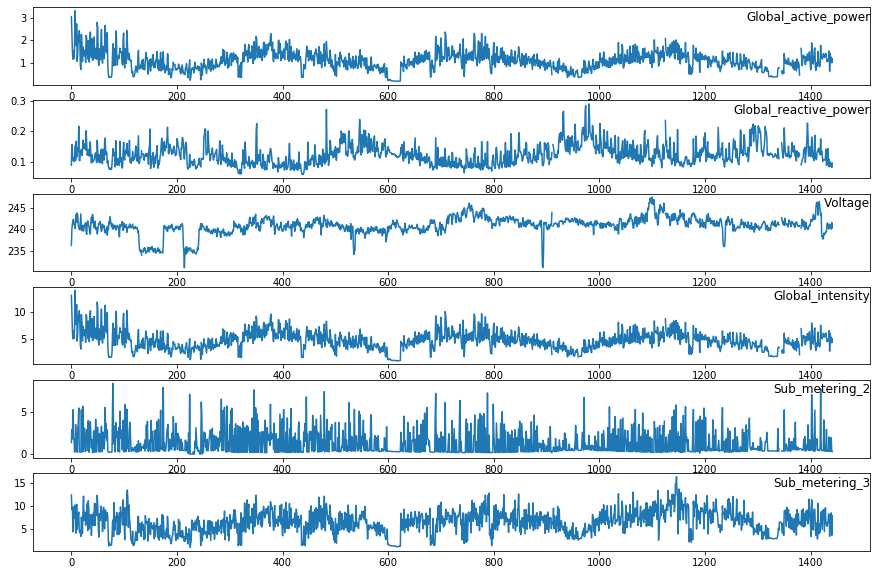

In [30]:
cols = [0, 1, 2, 3, 5, 6]
i = 1
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))

for group in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

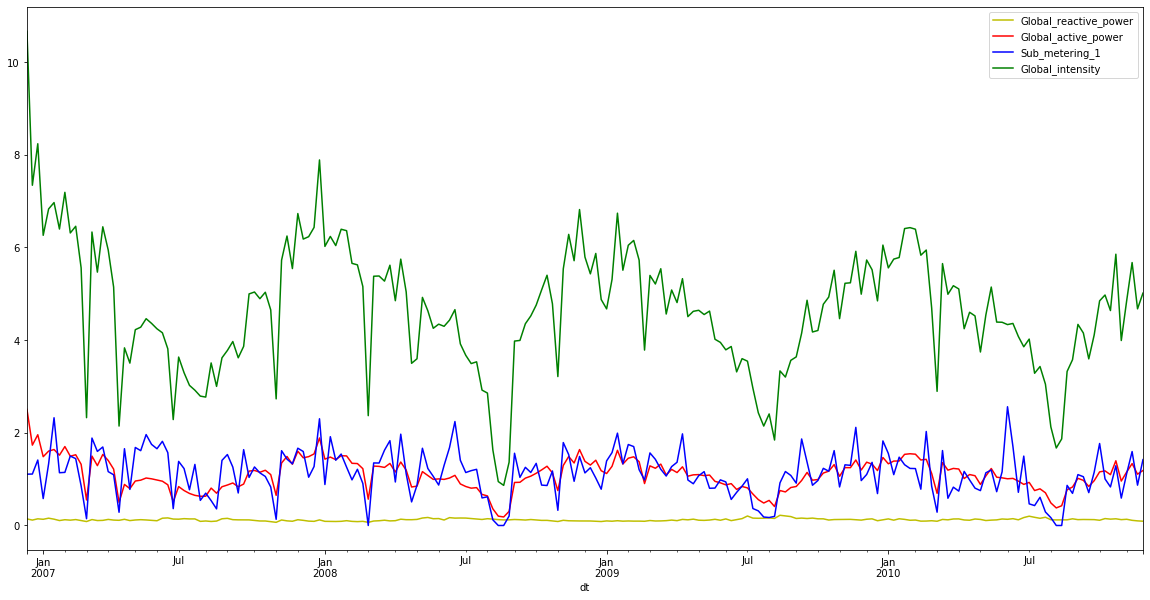

In [34]:
plt.figure(figsize=(20, 10))
## resampling over week and computing mean
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

### Correlation plots

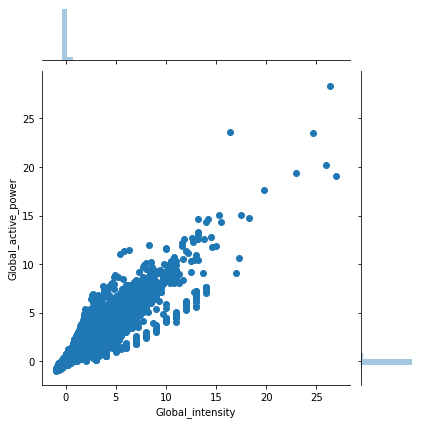

In [35]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

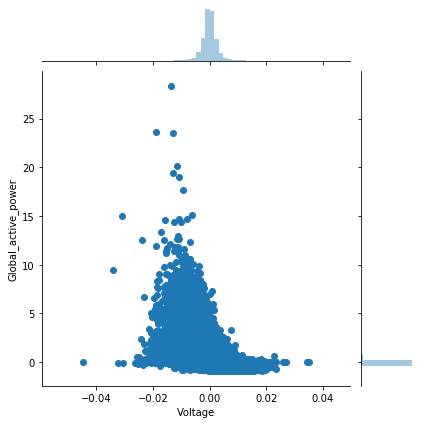

In [36]:
## The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

### Correlations among features

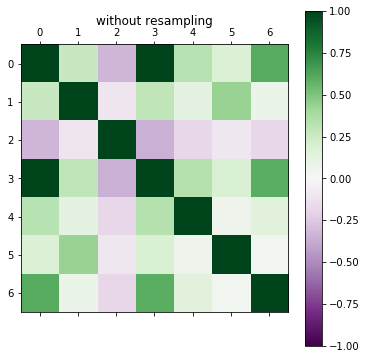

In [41]:
matplotlib.rcParams['figure.figsize']=(6, 6)
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=12)
plt.colorbar()
plt.show()

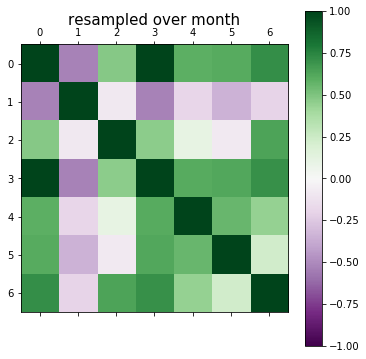

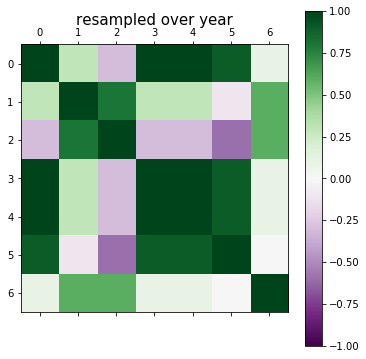

In [42]:
# Correlations of mean of features resampled over months
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

# Machine Learning

In [44]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [45]:

## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [47]:
from sklearn.preprocessing import MinMaxScaler
values = df_resample.values 

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


In [97]:
from sklearn.model_selection import train_test_split
values = reframed.values

X = values[:, :-1]
y = values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((27327, 7), (6832, 7))

In [98]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_train.shape, X_test.shape

((27327, 1, 7), (6832, 1, 7))

## Model Architecture

In [99]:
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

model = Sequential()
model.add(LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
# model.add(LSTM(70))
# model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=20, batch_size=70, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 27327 samples, validate on 6832 samples
Epoch 1/20
27327/27327 - 3s - loss: 0.0107 - val_loss: 0.0088
Epoch 2/20
27327/27327 - 2s - loss: 0.0093 - val_loss: 0.0087
Epoch 3/20
27327/27327 - 2s - loss: 0.0093 - val_loss: 0.0087
Epoch 4/20
27327/27327 - 2s - loss: 0.0092 - val_loss: 0.0087
Epoch 5/20
27327/27327 - 2s - loss: 0.0092 - val_loss: 0.0086
Epoch 6/20
27327/27327 - 2s - loss: 0.0092 - val_loss: 0.0086
Epoch 7/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 8/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 9/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 10/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 11/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 12/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 13/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 14/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 15/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 16/20
273

In [86]:
from sklearn.metrics import mean_squared_error 

# make a prediction
yhat = model.predict(X_test)
X_test_reshaped = X_test.reshape((X_test.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test_reshaped[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test_reshaped = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test_reshaped, X_test_reshaped[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.595


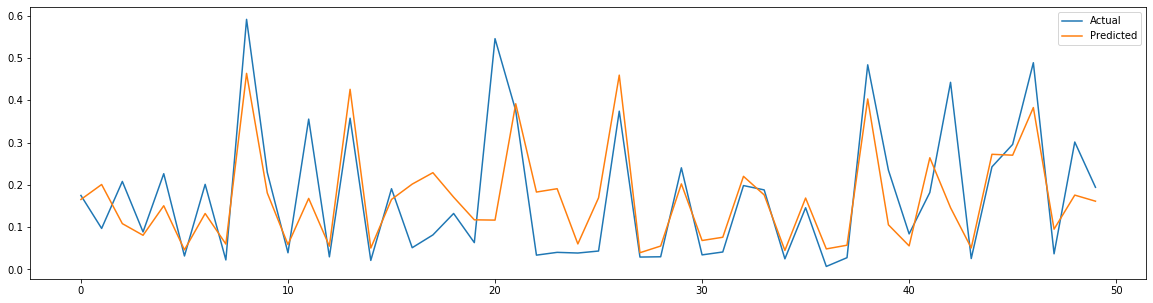

In [95]:
numValues=50

matplotlib.rcParams['figure.figsize'] = (20, 5)
plt.plot(y_test[:numValues])
plt.plot(yhat[:numValues])
plt.legend(['Actual', 'Predicted'])

### GRU Cell

In [100]:
model = Sequential()
model.add(GRU(256, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
# model.add(LSTM(70))
# model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=20, batch_size=70, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 27327 samples, validate on 6832 samples
Epoch 1/20
27327/27327 - 3s - loss: 0.0103 - val_loss: 0.0094
Epoch 2/20
27327/27327 - 2s - loss: 0.0094 - val_loss: 0.0091
Epoch 3/20
27327/27327 - 2s - loss: 0.0093 - val_loss: 0.0089
Epoch 4/20
27327/27327 - 2s - loss: 0.0093 - val_loss: 0.0087
Epoch 5/20
27327/27327 - 2s - loss: 0.0093 - val_loss: 0.0087
Epoch 6/20
27327/27327 - 2s - loss: 0.0092 - val_loss: 0.0087
Epoch 7/20
27327/27327 - 2s - loss: 0.0092 - val_loss: 0.0087
Epoch 8/20
27327/27327 - 2s - loss: 0.0092 - val_loss: 0.0087
Epoch 9/20
27327/27327 - 2s - loss: 0.0092 - val_loss: 0.0086
Epoch 10/20
27327/27327 - 2s - loss: 0.0092 - val_loss: 0.0086
Epoch 11/20
27327/27327 - 2s - loss: 0.0092 - val_loss: 0.0086
Epoch 12/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 13/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 14/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 15/20
27327/27327 - 2s - loss: 0.0091 - val_loss: 0.0086
Epoch 16/20
273

In [101]:
# make a prediction
yhat = model.predict(X_test)
X_test_reshaped = X_test.reshape((X_test.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test_reshaped[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test_reshaped = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test_reshaped, X_test_reshaped[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.596


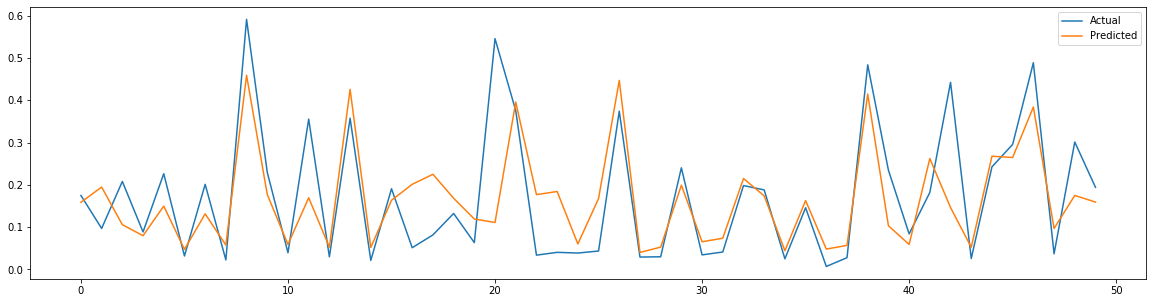

In [102]:
numValues=50

matplotlib.rcParams['figure.figsize'] = (20, 5)
plt.plot(y_test[:numValues])
plt.plot(yhat[:numValues])
plt.legend(['Actual', 'Predicted'])